## Happiness (Assignment 1)

### Background
    * There is no universally accepted definition of happiness, but there have been some ideas about how it
    could be measured.
    * In this assignment, we investigate the data from the World Happiness Report and produce a report
    about this data

### Data Source
    * World Happiness Data for 2023 : https://worldhappiness.report/data/  : Table 2.1
    * Dataset: DataForTable2.1WHR2023.xls

#### Approach    
    * We first generate the EDA reports and then the requested questions are answered in the end

#### References for Conclusion

1. [How to Report Skewness and Kurtosis](https://www.statology.org/how-to-report-skewness-kurtosis/)
2. [Interpretation of the Kurtosis Coefficient](https://link.springer.com/article/10.1057/jt.2009.5#:~:text=Values%20between%200.3%20and%200.7,a%20fuzzy%2Dfirm%20linear%20rule.&text=Values%20between%200.7%20and%201.0,through%20a%20firm%20linear%20rule.)


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDAAnalyzer Class

    * The `EDAAnalyzer` class is designed for exploratory data analysis (EDA) on a given DataFrame.

In [3]:
class EDAAnalyzer:
    
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def display_head(self, n=5):
        return self.dataframe.head(n)

    def display_shape(self):
        df_rows, df_cols = self.dataframe.shape
        return "Shape of data: rows: " + str(df_rows) + " cols: " + str(df_cols)

    def display_column_info(self):
        # A replacement for df.info but does the same functionality
        column_names = self.dataframe.columns.tolist()
        df_rows = len(self.dataframe)
        column_info_list = []

        for col in column_names:
            non_null_count = self.dataframe[col].count()
            percent_non_null = (non_null_count / df_rows) * 100
            data_type = self.dataframe[col].dtype

            column_info_list.append({
                'Column Name': col,
                'Non-null Count': non_null_count,
                'Percent Non-null': percent_non_null,
                'Data Type': data_type
            })

        column_info = pd.DataFrame(column_info_list)
        column_info = column_info.sort_values(by='Percent Non-null', ascending=False)
        column_info = column_info.reset_index(drop=True)

        return column_info

    def describe(self):
        return self.dataframe.describe().T

    def plot_histograms(self, ignore_columns=[]):
        columns_to_plot = [col for col in self.dataframe.columns if col not in ignore_columns]
        len_columns = len(columns_to_plot)

        num_rows = (len_columns + 3) // 4
        fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 4 * num_rows))
        axs = axs.flatten()

        for i, col in enumerate(columns_to_plot):
            sns.histplot(self.dataframe[col], ax=axs[i], kde=True)
            
        for j in range(i + 1, len(axs)):
            axs[j].axis('off')
        plt.subplots_adjust(hspace=0.5)
            
        plt.show()

    def get_skew_kurt(self, ignore_columns=[]):
        skew_kurt_data = {'Column Name': [], 'Skewness': [], 'Kurtosis': [], 'Category': []}
        columns_to_analyze = [col for col in self.dataframe.columns if col not in ignore_columns]
        skew_kurt_data = []
        
        for col in columns_to_analyze:
            skewness = abs(self.dataframe[col].skew())
            kurtosis = abs(self.dataframe[col].kurt())
            
            # Ref : https://www.statology.org/how-to-report-skewness-kurtosis/
            category = "Power Data" if skewness > 1 and kurtosis > 3 else \
                       "Normal Data" if abs(skewness) <= 1 and abs(kurtosis) <= 3 else \
                       "Inbetween"
            skew_row_data = {
                'Column Name': col,
                'Skewness': skewness,
                'Kurtosis': kurtosis,
                'Category': category
            }
            
            skew_kurt_data.append(skew_row_data)
        return pd.DataFrame(skew_kurt_data).sort_values(by='Category')



    def get_scatter_plot(self, y_col, add_trend=False):
        numeric_columns = self.dataframe.select_dtypes(include=['number']).columns
        numeric_columns = [col for col in numeric_columns if col not in [y_col]]

        num_plots = len(numeric_columns)
        num_cols = 3
        num_rows = (num_plots + 1) // 2
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))
        axs = axs.flatten()
    
        for i, col in enumerate(numeric_columns):
            if(not add_trend):
                sns.scatterplot(data=self.dataframe, x=self.dataframe[col], y=self.dataframe[y_col], ax=axs[i])
            else:    
                sns.regplot(data=self.dataframe, x=self.dataframe[col], y=self.dataframe[y_col], ax=axs[i], scatter=False, color='red')

        for j in range(i + 1, len(axs)):
            axs[j].axis('off')

        plt.subplots_adjust(hspace=0.5)
        plt.show()

    def get_pair_plot(self):
        return sns.pairplot(self.dataframe)

    def get_box_plot(self):
        numeric_columns = self.dataframe.select_dtypes(include=['number']).columns

        num_plots = len(numeric_columns)
        num_cols = 3
        num_rows = (num_plots + 1) // 2
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 14))
        axs = axs.flatten()

        for i, col in enumerate(numeric_columns):
            sns.boxplot(data=self.dataframe, y=self.dataframe[col], ax=axs[i])
            axs[i].set_xlabel(col)

        for j in range(i + 1, len(axs)):
            axs[j].axis('off')

        plt.subplots_adjust(hspace=0.5)
        plt.show()

    def get_heat_map(self):
        non_numeric_columns = self.dataframe.select_dtypes(exclude=['number']).columns
        correlation_matrix = self.dataframe.drop(non_numeric_columns, axis=1).corr().abs()
        sns.heatmap(correlation_matrix, annot=True)
        plt.show()

    def get_correlation_pairs(self):

        # Reference 2
        threshold_high=0.7
        threshold_low=0.3
        
        numeric_columns = self.dataframe.select_dtypes(include=['number']).columns
        correlation_matrix = self.dataframe[numeric_columns].corr().abs()

        correlation_pairs_df = []

        for i,col1 in enumerate(numeric_columns):
            for j,col2 in enumerate(numeric_columns):
                if col1 != col2:
                    if i < j:
                        
                        correlation_coefficient = correlation_matrix.loc[col1, col2]

                        if correlation_coefficient > threshold_high:
                            correlation_category = 'High'
                        elif correlation_coefficient <= threshold_low:
                            correlation_category = 'Low'
                        else:
                            correlation_category = 'Moderate'
                            
                        correlation_pairs_df.append({
                            'Column 1': col1,
                            'Column 2': col2,
                            'Correlation Coefficient': correlation_coefficient,
                            'Correlation Category': correlation_category
                        })

        return pd.DataFrame(correlation_pairs_df)

    
    def get_top_correlated_pairs(self, n=10):
        top_correlated_pairs = self.get_correlation_pairs().sort_values(by='Correlation Coefficient', ascending=False).head(n)
        return top_correlated_pairs

    def get_top_correlated_pairs_by_column(self,column_name,n=10):
        top_correlated_pairs = self.get_correlation_pairs()
        top_correlated_pairs = top_correlated_pairs[(top_correlated_pairs["Column 1"]==column_name) | (top_correlated_pairs["Column 2"]==column_name)]
        return top_correlated_pairs.sort_values(by='Correlation Coefficient', ascending=False).head(n)

    def plot_life_ladder_over_time(self):
        plt.figure(figsize=(12, 6))
        for country in self.dataframe['Country name'].unique():
            country_info = self.dataframe[self.dataframe['Country name'] == country]
            plt.plot(country_info['year'], country_info['Life Ladder'], label=country, linewidth=0.5)

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
        plt.show()

    def plot_life_ladder_change_over_time(self):
        plt.figure(figsize=(12, 6))
        change_data = self.dataframe
        change_data['Life Ladder (% Change)'] = change_data.groupby('Country name')['Life Ladder'].pct_change() * 100
        for country in change_data['Country name'].unique():
            country_info = change_data[change_data['Country name'] == country]
            plt.plot(country_info['year'], country_info['Life Ladder (% Change)'], label=country, linewidth=0.2)

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
        plt.show()


    def get_missing_rows(self):
        return self.dataframe[self.dataframe.isnull().any(axis=1)]

    def get_most_least_happy_countries(self, years):
        result = []

        for year in years:
            year_data = self.dataframe[self.dataframe['year'] == year]

            most_happy = year_data.loc[year_data['Life Ladder'].idxmax()]
            least_happy = year_data.loc[year_data['Life Ladder'].idxmin()]

            result.append({
                'Year': year,
                'Most Happy Country': most_happy['Country name'],
                'Most Happy Value': most_happy['Life Ladder'],
                'Least Happy Country': least_happy['Country name'],
                'Least Happy Value': least_happy['Life Ladder']
            })

        most_happy_all_time = self.dataframe.loc[self.dataframe['Life Ladder'].idxmax()]
        least_happy_all_time = self.dataframe.loc[self.dataframe['Life Ladder'].idxmin()]

        result.append({
            'Year': 'All Time',
            'Most Happy Country': most_happy_all_time['Country name'],
            'Most Happy Value': most_happy_all_time['Life Ladder'],
            'Least Happy Country': least_happy_all_time['Country name'],
            'Least Happy Value': least_happy_all_time['Life Ladder']
        })

        result_df = pd.DataFrame(result)
        return result_df


    def find_largest_change_in_happiness(self,current_year=2022):

        result = []
        for country in self.dataframe['Country name'].unique():
            country_info = self.dataframe[self.dataframe['Country name'] == country]
            min_row = country_info.loc[country_info['year'].idxmin()]
            max_row = country_info.loc[country_info['year'].idxmax()]

            if(max_row["year"]==current_year):
                result.append({
                    'Country': country,
                    'Start Year': min_row["year"],
                    'Start Happiness': min_row["Life Ladder"],
                    'End Year': max_row["year"],
                    'End Happiness': max_row["Life Ladder"],
                    '% Change': 100*((max_row["Life Ladder"]-min_row["Life Ladder"])/(min_row["Life Ladder"]))
                    })

        return pd.DataFrame(result)
        


In [4]:
# Load data
data_loc = "DataForTable2.1WHR2023.xls"
df = pd.read_excel(data_loc)

# Create an instance of EDAAnalyzer
eda_analyzer = EDAAnalyzer(df)

eda_analyzer.display_head(10)

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   
5  Afghanistan  2013     3.572100            7.680333        0.483552   
6  Afghanistan  2014     3.130896            7.670638        0.525568   
7  Afghanistan  2015     3.982855            7.653833        0.528597   
8  Afghanistan  2016     4.220169            7.650370        0.559072   
9  Afghanistan  2017     2.661718            7.647830        0.490880   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.167652   
1                         50.799999                      0.678896    0.190809   
2                         51.099998                      0.600127    0.121316   
3                         51.400002                      0.495901    0.163571   
4                         51.700001                      0.530935    0.237588   
5                         52.000000                      0.577955    0.062666   
6                         52.299999                      0.508514    0.105755   
7                         52.599998                      0.388928    0.081652   
8                         52.924999                      0.522566    0.043916   
9                         53.250000                      0.427011   -0.119410   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.881686         0.414297         0.258195  
1                   0.850035         0.481421         0.237092  
2                   0.706766         0.516907         0.275324  
3                   0.731109         0.479835         0.267175  
4                   0.775620         0.613513         0.267919  
5                   0.823204         0.547417         0.273328  
6                   0.871242         0.491641         0.374861  
7                   0.880638         0.491410         0.339276  
8                   0.793246         0.501409         0.348332  
9                   0.954393         0.435270         0.371326

## Info on dataset

In [5]:
# Data shape
eda_analyzer.display_shape()

'Shape of data: rows: 2199 cols: 11'

In [6]:
# Display null info and type for columns
# below function replaces df.info

eda_analyzer.display_column_info()

Column Name  Non-null Count  Percent Non-null  \
0                       Country name            2199        100.000000   
1                               year            2199        100.000000   
2                        Life Ladder            2199        100.000000   
3                     Social support            2186         99.408822   
4                    Negative affect            2183         99.272397   
5                 Log GDP per capita            2179         99.090496   
6                    Positive affect            2175         98.908595   
7       Freedom to make life choices            2166         98.499318   
8   Healthy life expectancy at birth            2145         97.544338   
9                         Generosity            2126         96.680309   
10         Perceptions of corruption            2083         94.724875   

   Data Type  
0     object  
1      int64  
2    float64  
3    float64  
4    float64  
5    float64  
6    float64  
7    float64  
8    float64  
9    float64  
10   float64

In [7]:
eda_analyzer.describe()

count         mean       std          min  \
year                              2199.0  2014.161437  4.718736  2005.000000   
Life Ladder                       2199.0     5.479226  1.125529     1.281271   
Log GDP per capita                2179.0     9.389766  1.153387     5.526723   
Social support                    2186.0     0.810679  0.120952     0.228217   
Healthy life expectancy at birth  2145.0    63.294583  6.901104     6.720000   
Freedom to make life choices      2166.0     0.747858  0.140150     0.257534   
Generosity                        2126.0     0.000096  0.161083    -0.337527   
Perceptions of corruption         2083.0     0.745195  0.185837     0.035198   
Positive affect                   2175.0     0.652143  0.105922     0.178886   
Negative affect                   2183.0     0.271501  0.086875     0.082737   

                                          25%          50%          75%  \
year                              2010.000000  2014.000000  2018.000000   
Life Ladder                          4.646750     5.432437     6.309460   
Log GDP per capita                   8.499764     9.498955    10.373216   
Social support                       0.746609     0.835535     0.904792   
Healthy life expectancy at birth    59.119999    65.050003    68.500000   
Freedom to make life choices         0.656528     0.769821     0.859382   
Generosity                          -0.112116    -0.022671     0.092070   
Perceptions of corruption            0.688139     0.799654     0.868827   
Positive affect                      0.571684     0.663063     0.737936   
Negative affect                      0.207660     0.260671     0.322894   

                                          max  
year                              2022.000000  
Life Ladder                          8.018934  
Log GDP per capita                  11.663788  
Social support                       0.987343  
Healthy life expectancy at birth    74.474998  
Freedom to make life choices         0.985178  
Generosity                           0.702708  
Perceptions of corruption            0.983276  
Positive affect                      0.883586  
Negative affect                      0.704590

# Univariate Analysis

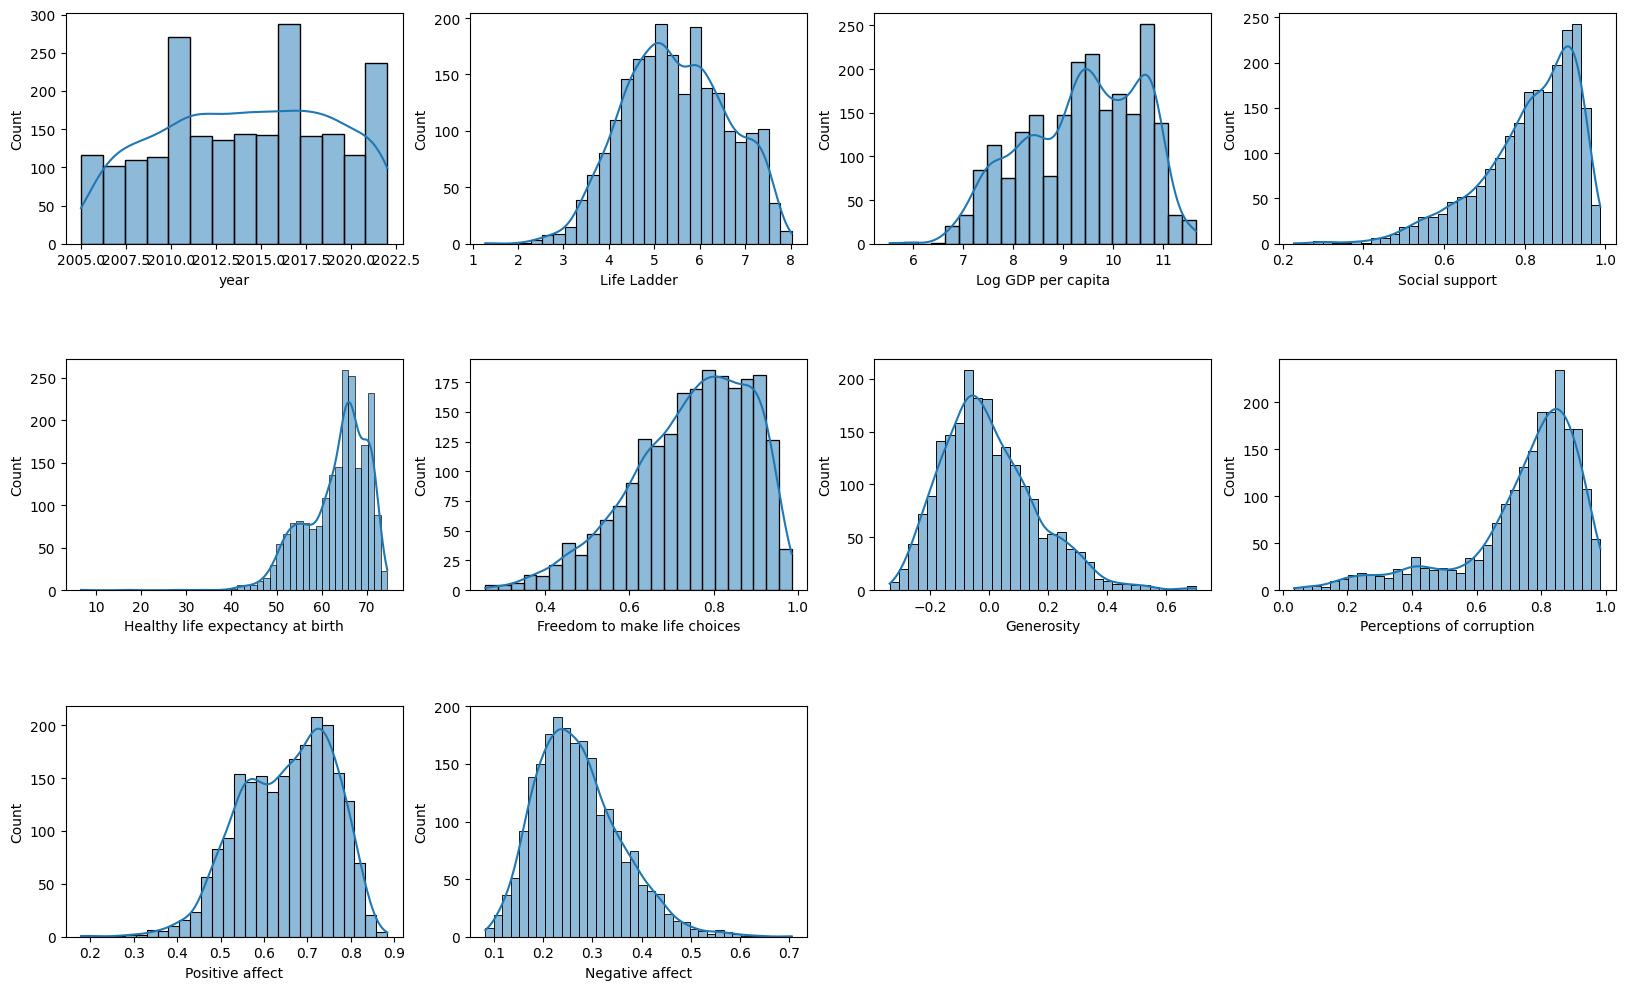

In [8]:
eda_analyzer.plot_histograms(ignore_columns=["Country name"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

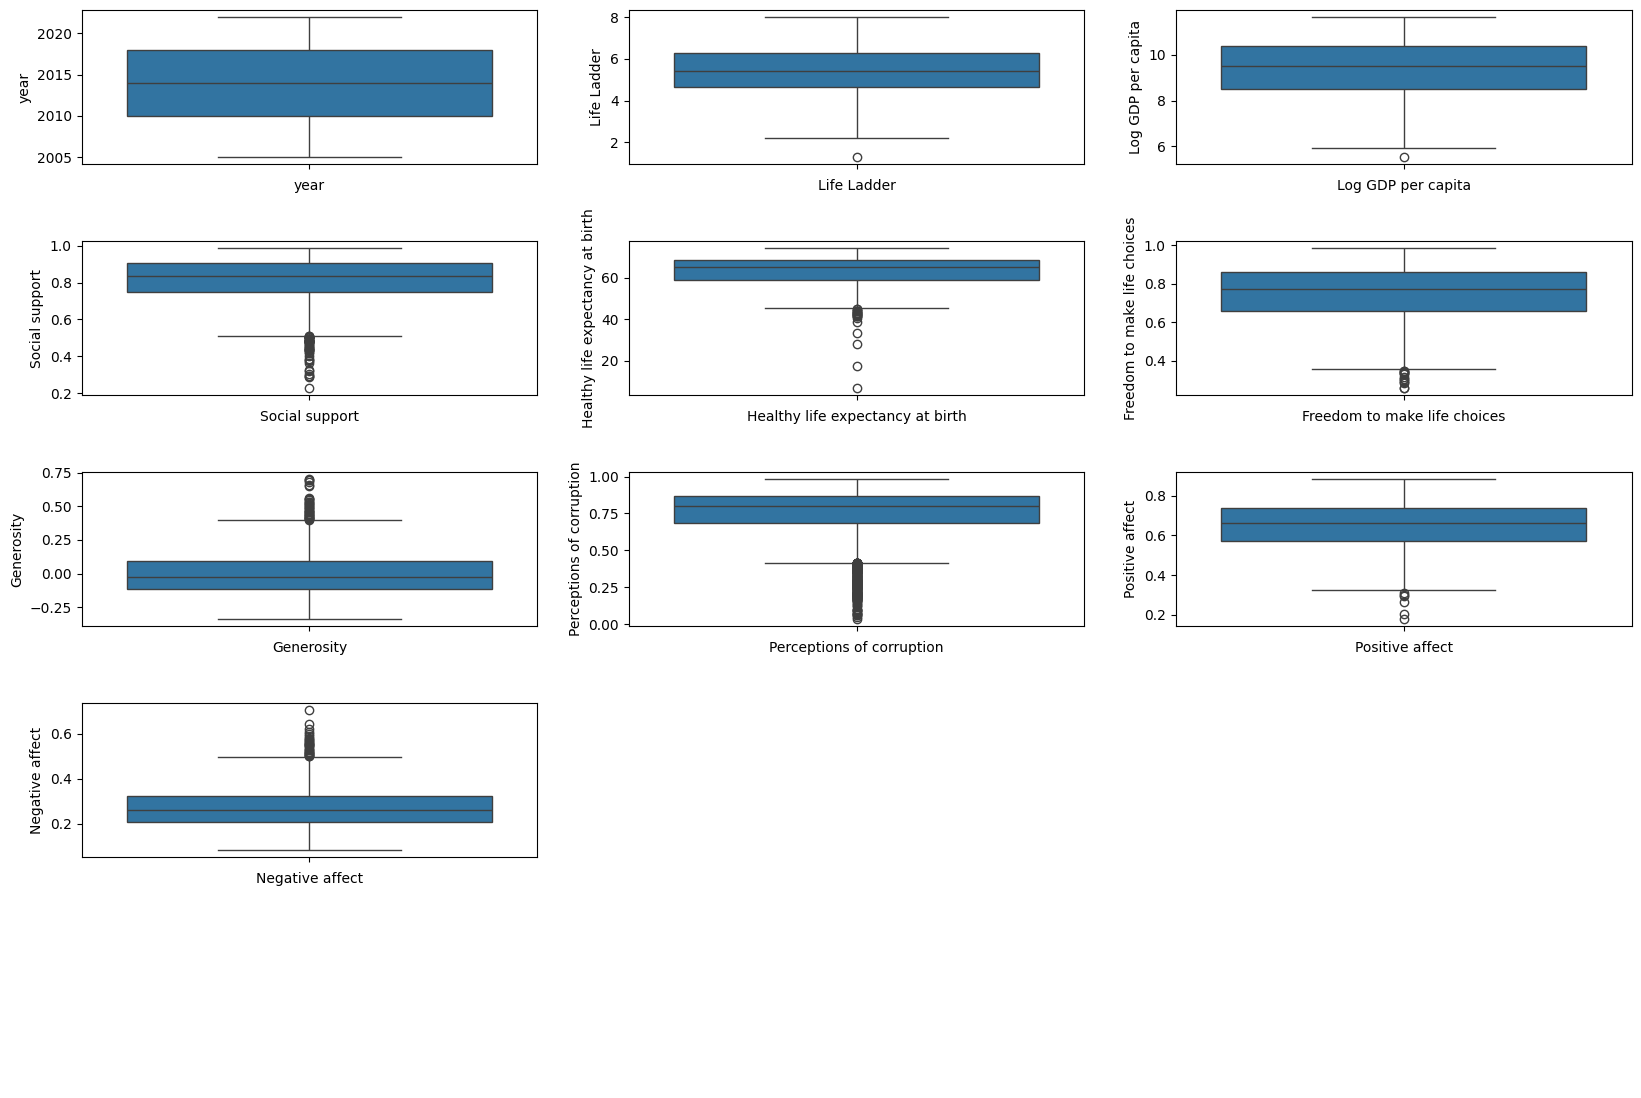

In [9]:
eda_analyzer.get_box_plot()

In [10]:
## Bivariate Analysis

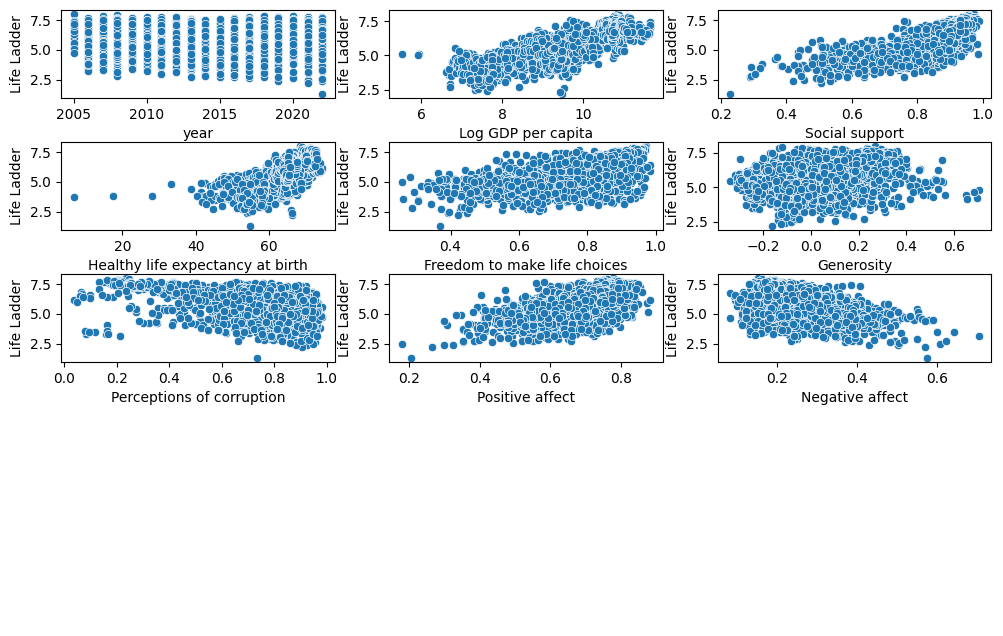

In [11]:
eda_analyzer.get_scatter_plot("Life Ladder")

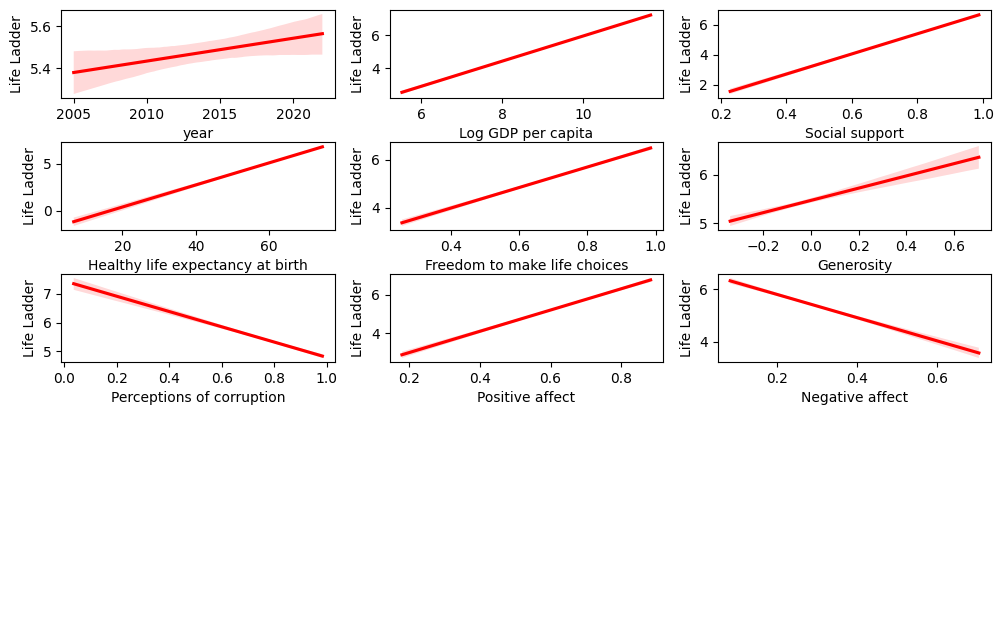

In [12]:
eda_analyzer.get_scatter_plot("Life Ladder",add_trend=True)

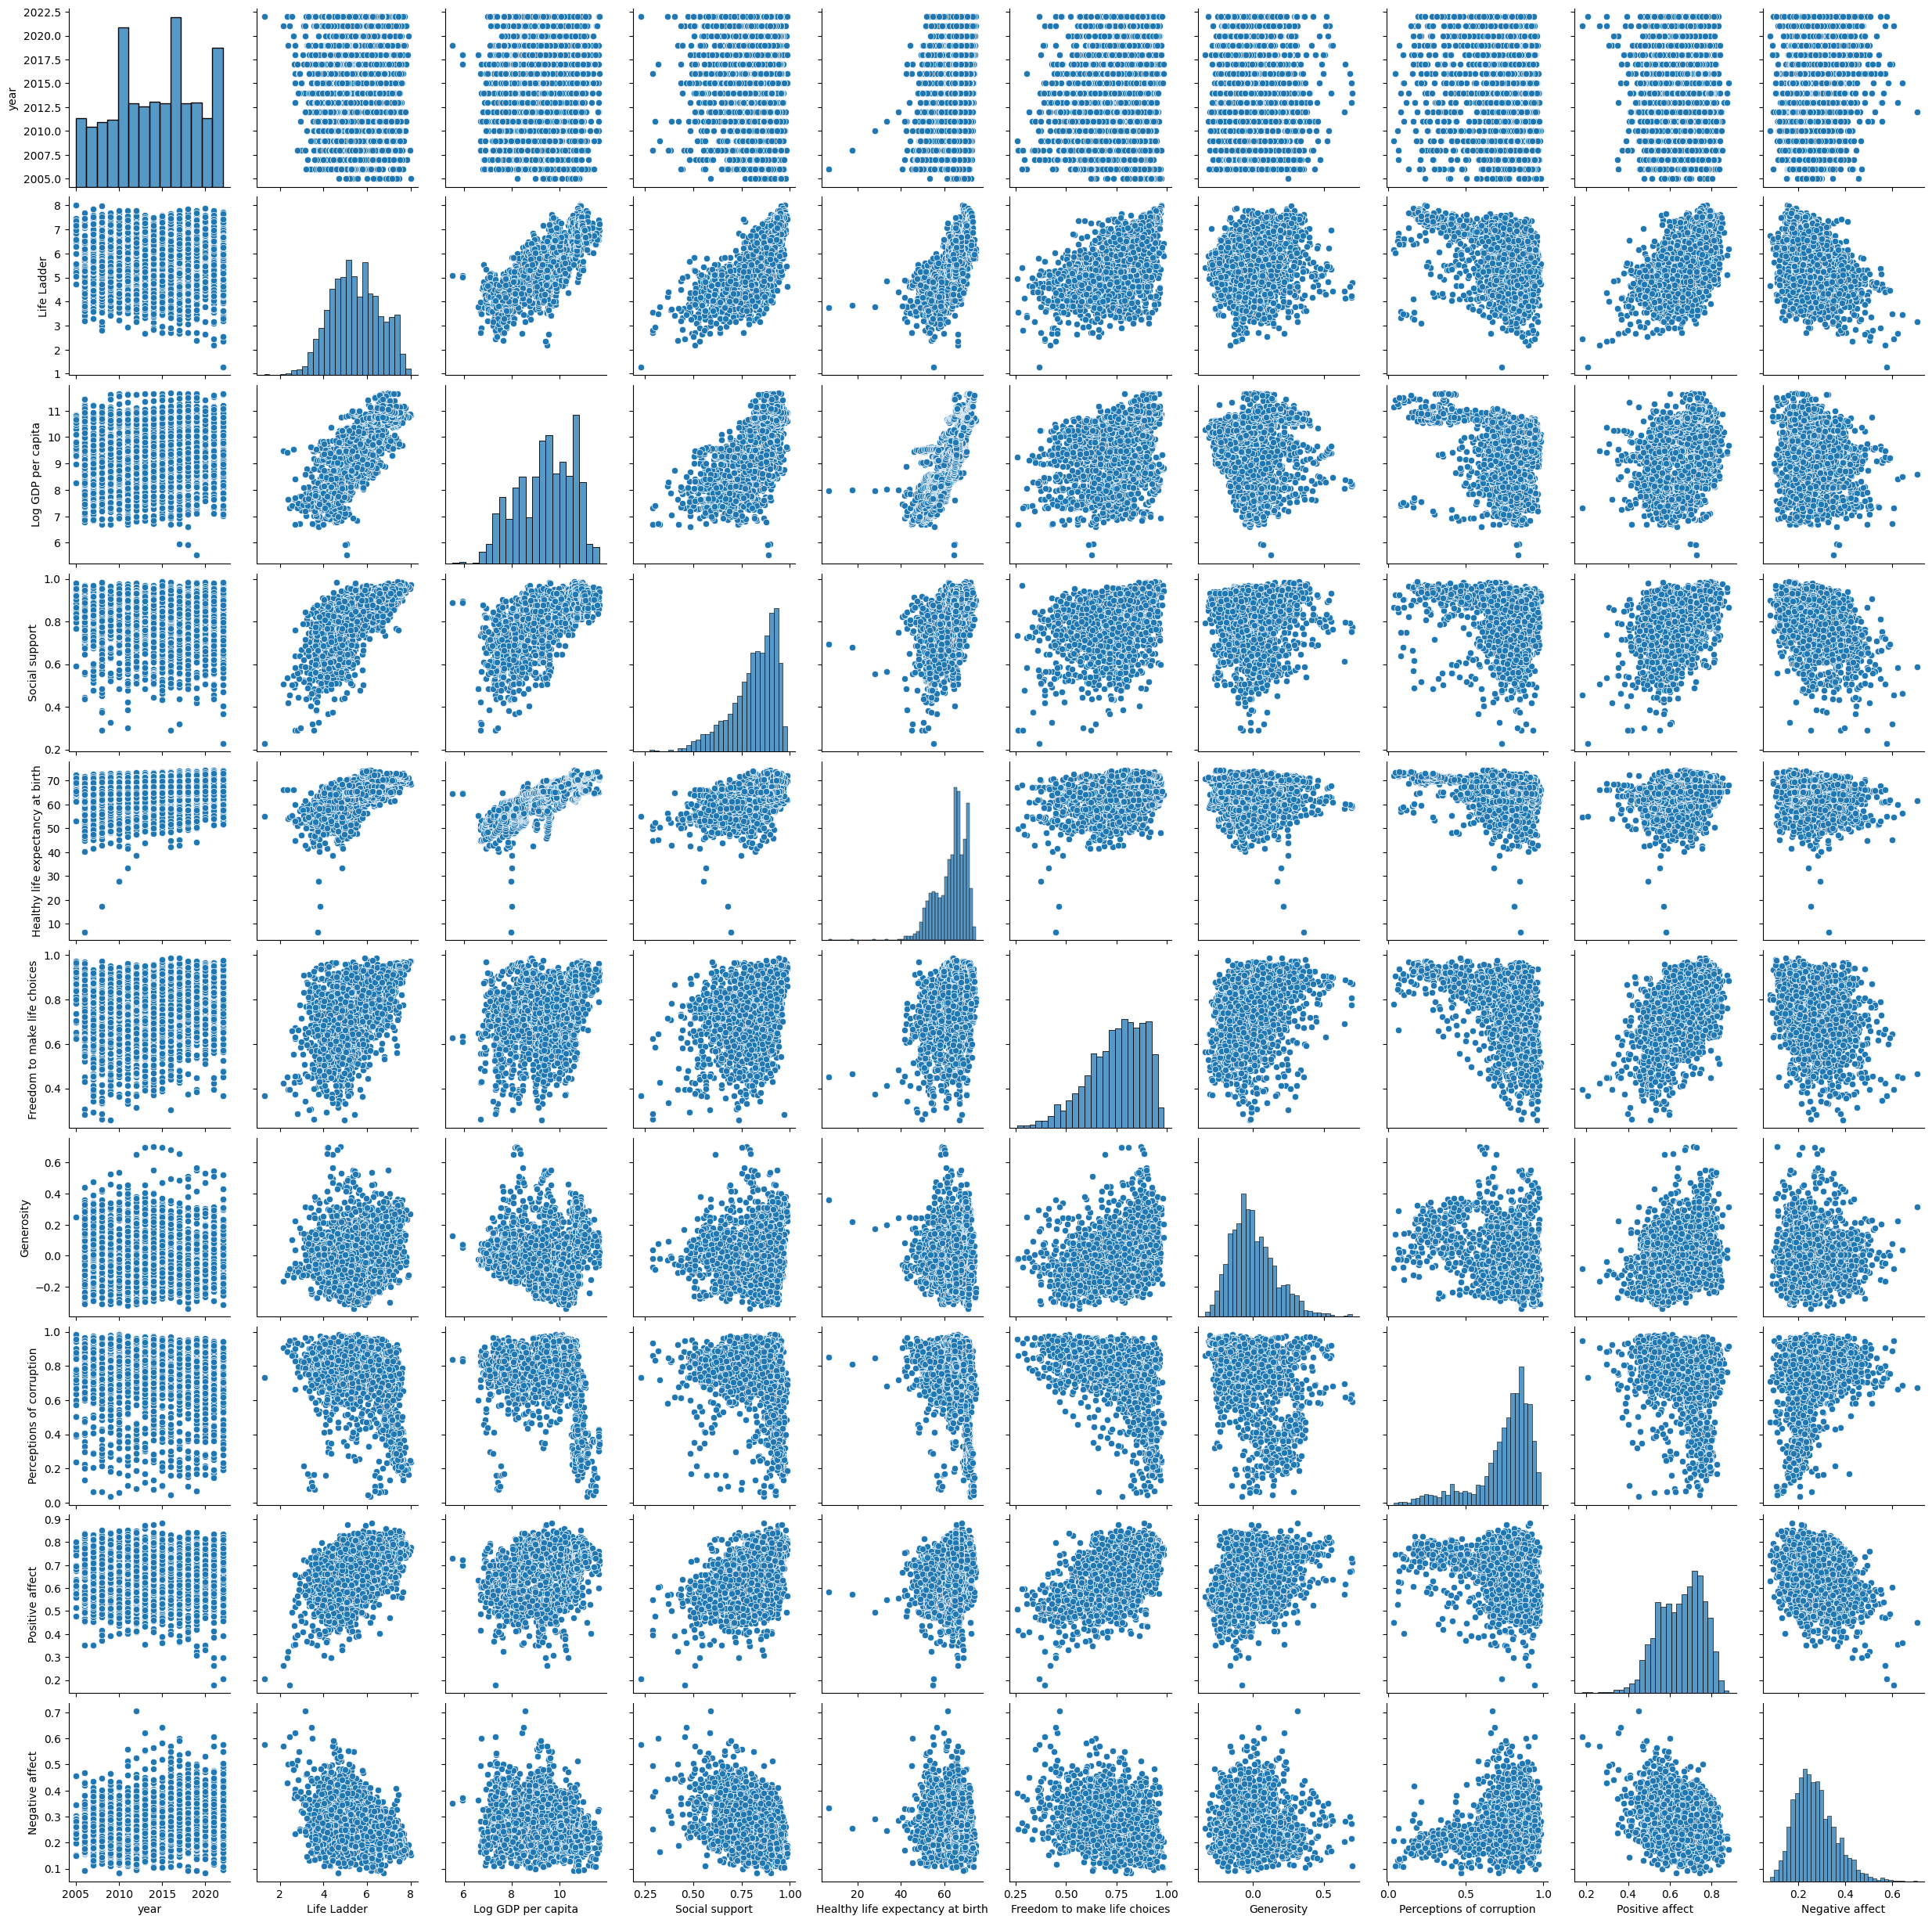

In [13]:
eda_analyzer.get_pair_plot()

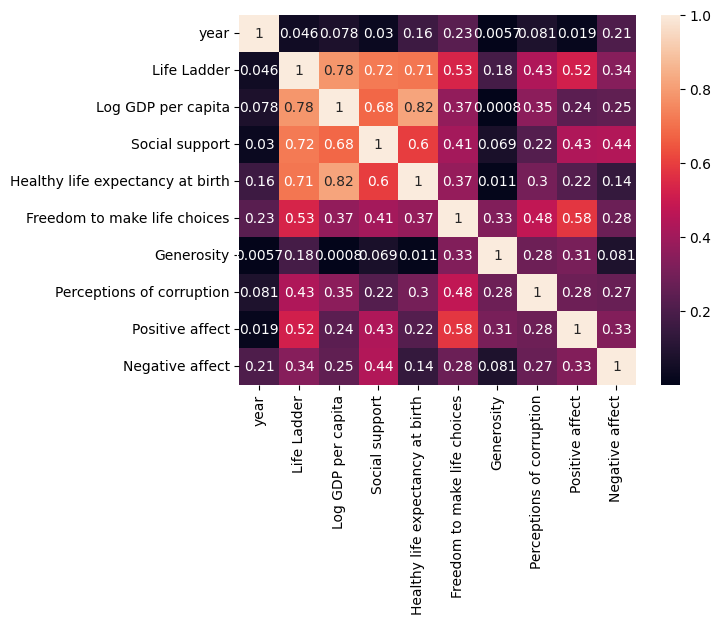

In [14]:
eda_analyzer.get_heat_map()

In [15]:
eda_analyzer.get_correlation_pairs().head(5)

Column 1                          Column 2  Correlation Coefficient  \
0     year                       Life Ladder                 0.045943   
1     year                Log GDP per capita                 0.077772   
2     year                    Social support                 0.029750   
3     year  Healthy life expectancy at birth                 0.163500   
4     year      Freedom to make life choices                 0.234105   

  Correlation Category  
0                  Low  
1                  Low  
2                  Low  
3                  Low  
4                  Low

In [16]:
eda_analyzer.get_top_correlated_pairs()

Column 1                          Column 2  \
18            Log GDP per capita  Healthy life expectancy at birth   
9                    Life Ladder                Log GDP per capita   
10                   Life Ladder                    Social support   
11                   Life Ladder  Healthy life expectancy at birth   
17            Log GDP per capita                    Social support   
24                Social support  Healthy life expectancy at birth   
37  Freedom to make life choices                   Positive affect   
12                   Life Ladder      Freedom to make life choices   
15                   Life Ladder                   Positive affect   
36  Freedom to make life choices         Perceptions of corruption   

    Correlation Coefficient Correlation Category  
18                 0.818126                 High  
9                  0.784871                 High  
10                 0.721663                 High  
11                 0.713493                 High  
17                 0.683619             Moderate  
24                 0.597682             Moderate  
37                 0.578752             Moderate  
12                 0.534532             Moderate  
15                 0.518207             Moderate  
36                 0.476537             Moderate

In [17]:
eda_analyzer.get_top_correlated_pairs_by_column(column_name="Life Ladder")

Column 1                          Column 2  Correlation Coefficient  \
9   Life Ladder                Log GDP per capita                 0.784871   
10  Life Ladder                    Social support                 0.721663   
11  Life Ladder  Healthy life expectancy at birth                 0.713493   
12  Life Ladder      Freedom to make life choices                 0.534532   
15  Life Ladder                   Positive affect                 0.518207   
14  Life Ladder         Perceptions of corruption                 0.431569   
16  Life Ladder                   Negative affect                 0.339992   
13  Life Ladder                        Generosity                 0.181658   
0          year                       Life Ladder                 0.045943   

   Correlation Category  
9                  High  
10                 High  
11                 High  
12             Moderate  
15             Moderate  
14             Moderate  
16             Moderate  
13                  Low  
0                   Low

# Time Series Analysis

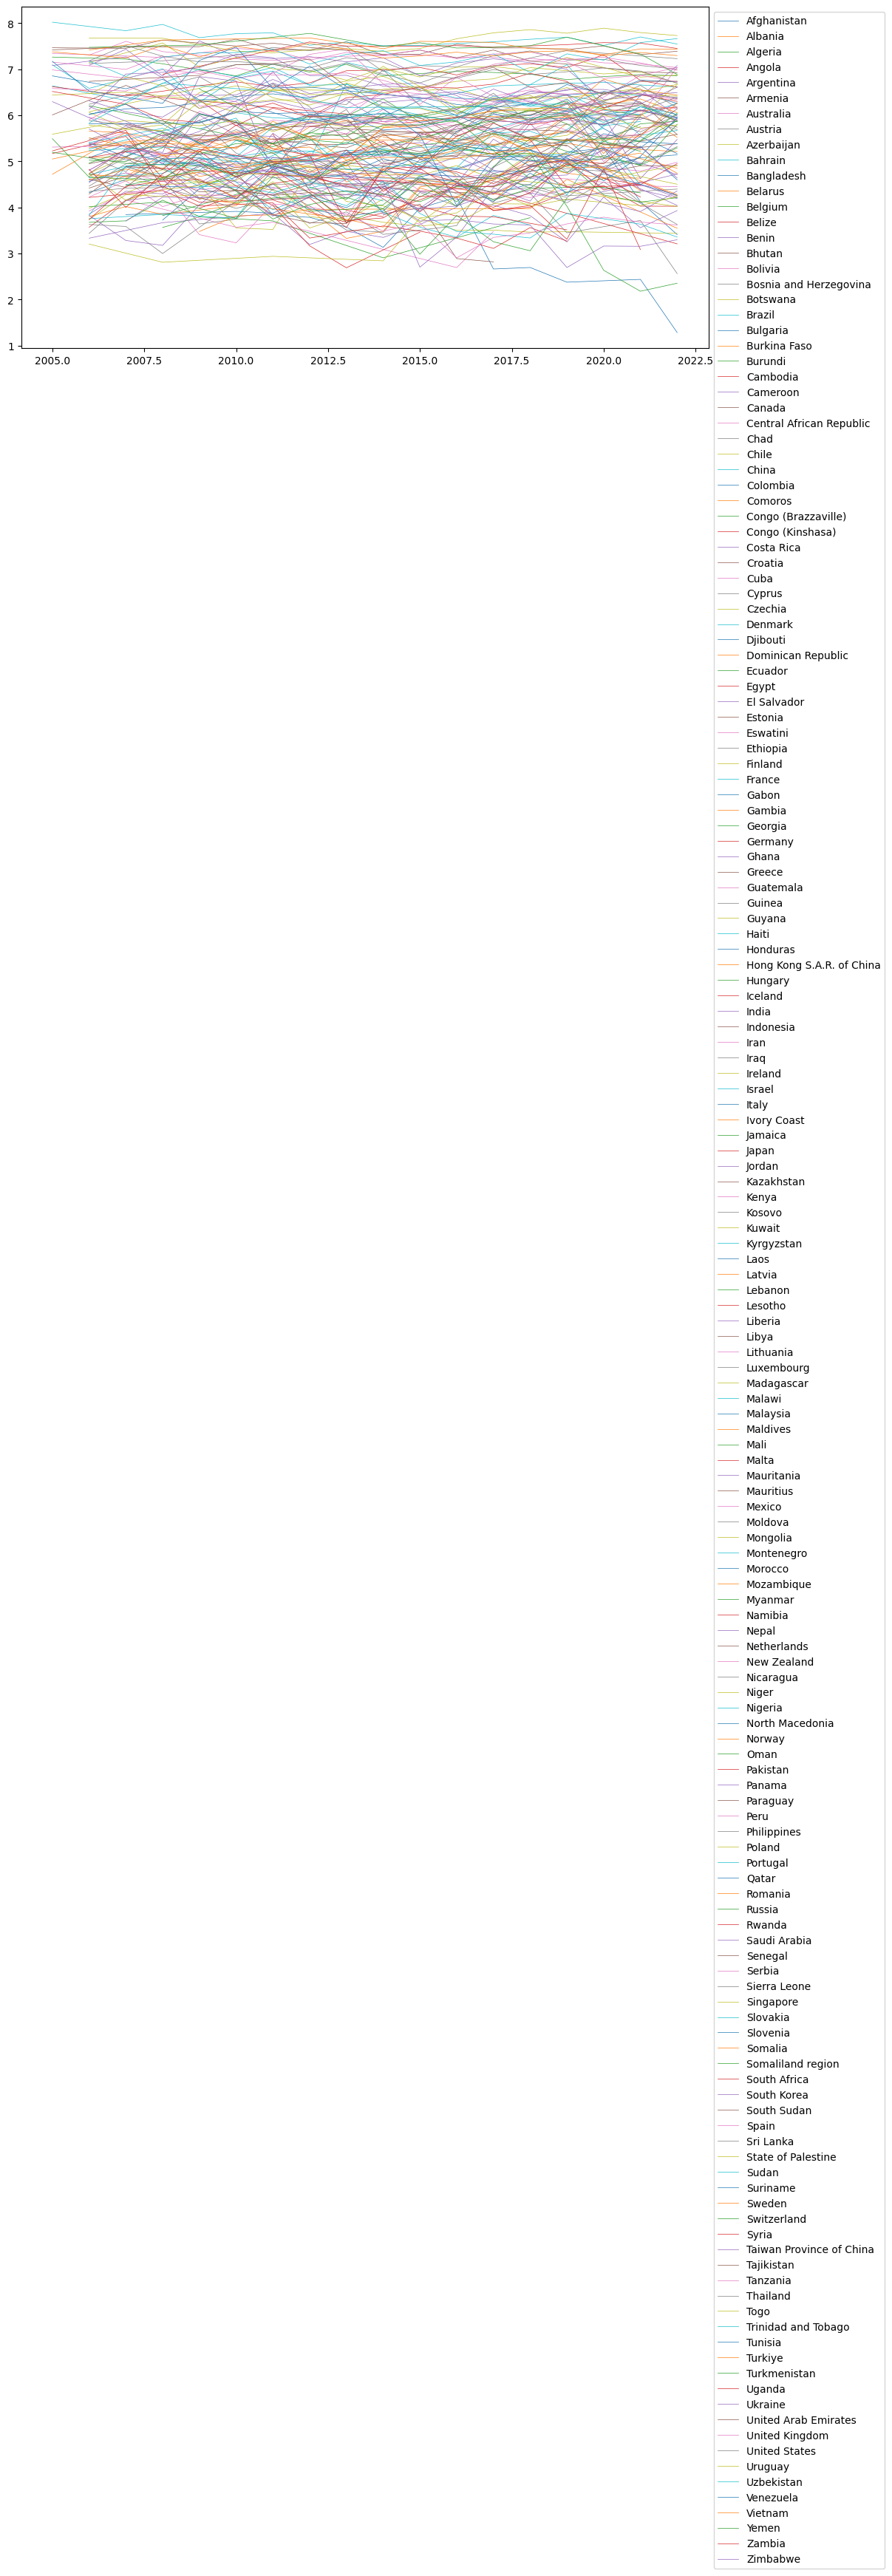

In [18]:
eda_analyzer.plot_life_ladder_over_time()

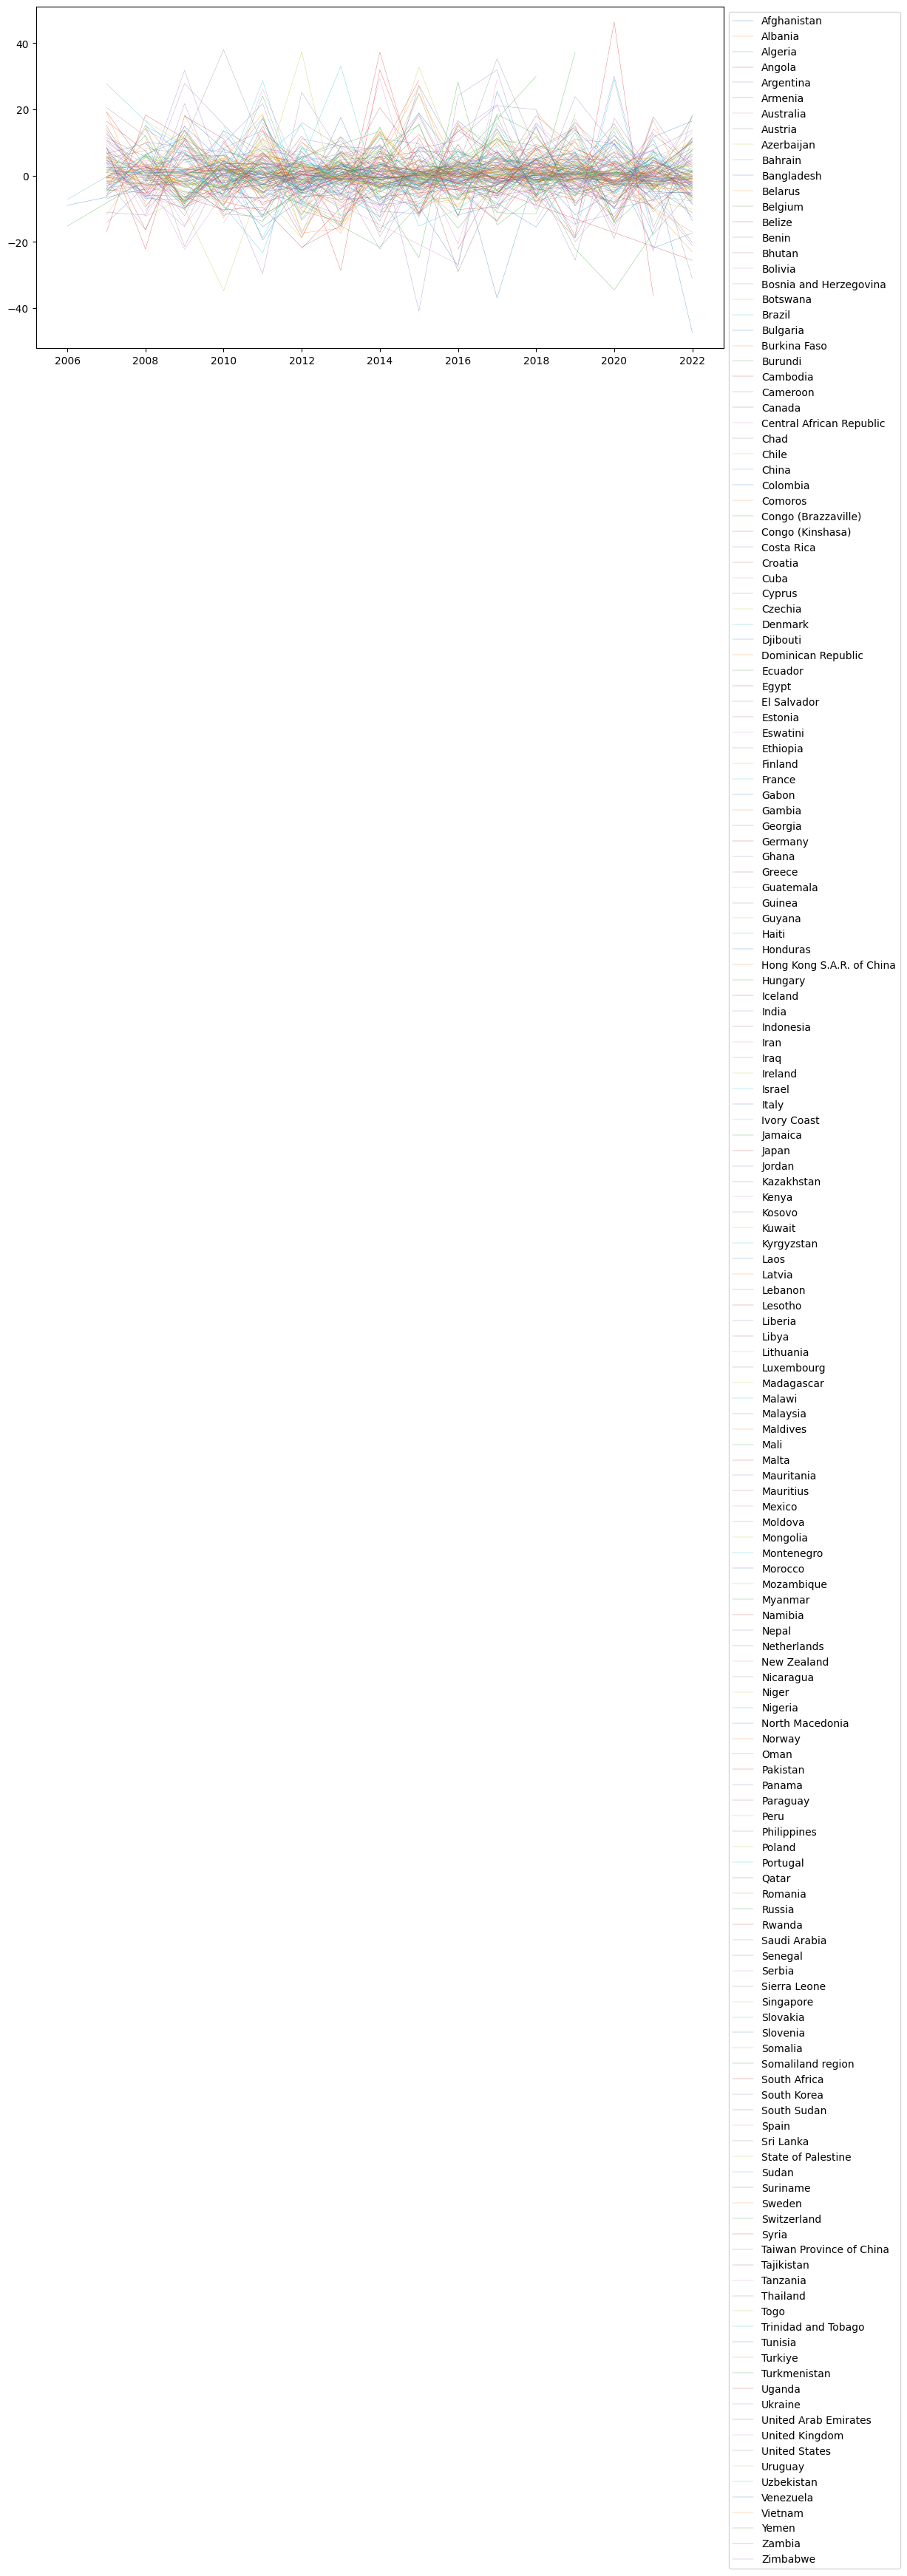

In [19]:
eda_analyzer.plot_life_ladder_change_over_time()

# Questions Answered

 1. How large is the dataset

In [20]:
eda_analyzer.display_shape()

'Shape of data: rows: 2199 cols: 12'

 2. What are the features , how are they represented?

In [21]:
eda_analyzer.display_column_info()

Column Name  Non-null Count  Percent Non-null  \
0                       Country name            2199        100.000000   
1                               year            2199        100.000000   
2                        Life Ladder            2199        100.000000   
3                     Social support            2186         99.408822   
4                    Negative affect            2183         99.272397   
5                 Log GDP per capita            2179         99.090496   
6                    Positive affect            2175         98.908595   
7       Freedom to make life choices            2166         98.499318   
8   Healthy life expectancy at birth            2145         97.544338   
9                         Generosity            2126         96.680309   
10         Perceptions of corruption            2083         94.724875   
11            Life Ladder (% Change)            2034         92.496589   

   Data Type  
0     object  
1      int64  
2    float64  
3    float64  
4    float64  
5    float64  
6    float64  
7    float64  
8    float64  
9    float64  
10   float64  
11   float64

 3. Are there any interesting distributions in the (numeric) features? 

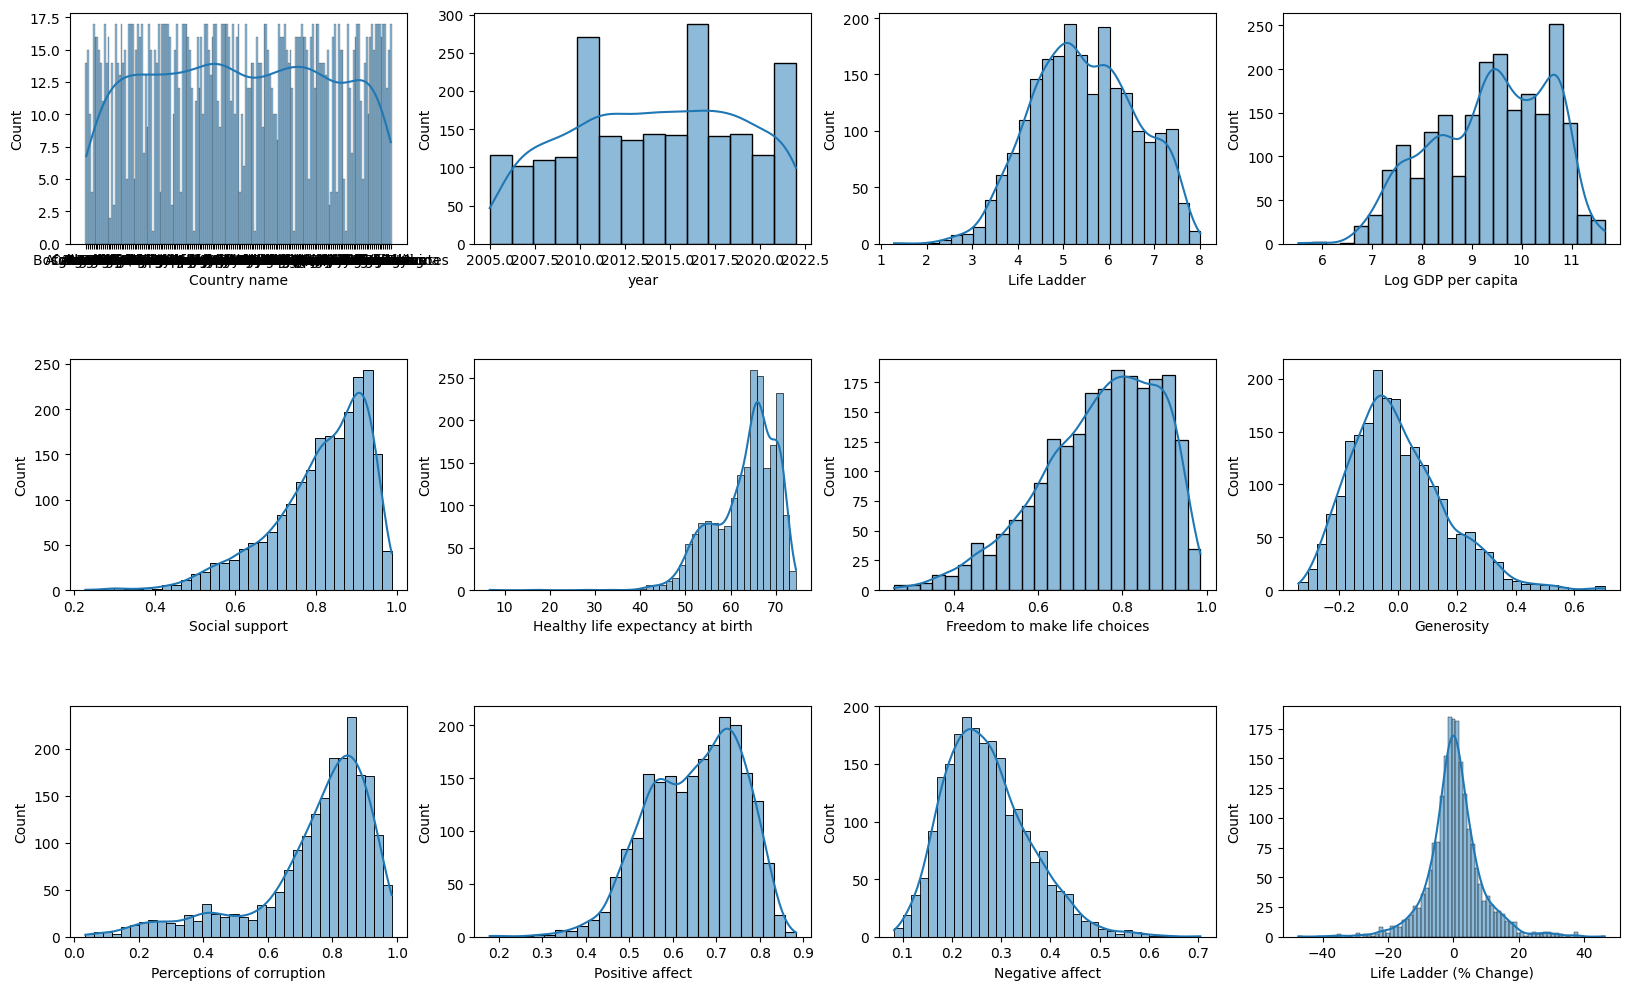

In [22]:
eda_analyzer.plot_histograms()

    - We see a drastic drop in participating countries in 2020. Probably an  impact of COVID. But that number hasnt gone up since then showing a some countries might not be willing to participate in the analytics possibly with disagreements. Needs further readings

In [23]:
eda_analyzer.get_skew_kurt(ignore_columns=["Country name"])

Column Name  Skewness  Kurtosis     Category
3                     Social support  1.118834  1.173909    Inbetween
4   Healthy life expectancy at birth  1.145454  2.989660    Inbetween
7          Perceptions of corruption  1.490418  1.814231    Inbetween
10            Life Ladder (% Change)  0.175574  3.960590    Inbetween
0                               year  0.076683  1.071694  Normal Data
1                        Life Ladder  0.017819  0.591848  Normal Data
2                 Log GDP per capita  0.335130  0.773036  Normal Data
5       Freedom to make life choices  0.670538  0.034785  Normal Data
6                         Generosity  0.777087  0.831590  Normal Data
8                    Positive affect  0.436205  0.207818  Normal Data
9                    Negative affect  0.731083  0.757400  Normal Data

    - Social support,Healthy life expectancy at birth,Perceptions of corruption fall neither between normal or a poer distribution, the rest of the variables follow more of a normal distribution

In [24]:
df.groupby('year')['Country name'].nunique().reset_index()

year  Country name
0   2005            27
1   2006            89
2   2007           102
3   2008           110
4   2009           114
5   2010           124
6   2011           146
7   2012           141
8   2013           136
9   2014           144
10  2015           142
11  2016           141
12  2017           147
13  2018           141
14  2019           143
15  2020           116
16  2021           122
17  2022           114

    - Life ladder follows a normal distribution, which is an expected behaviour of a generated value of rating type

    - The number of particilating countries from the lower GDP/capita section is very low, resulting in possible not considering parameters of happiness in such countries

    - The data trends across different parameters suggest the same that the countries under participation are mostly from the developing or developed spectrum. The data doesnt show uniform distribution across parameters.

    - The most skewed data of all is social security. Either coutries offering social sequrity are low or refusal in participation. Needs further reading

4. Are there any interesting correlations in the data?

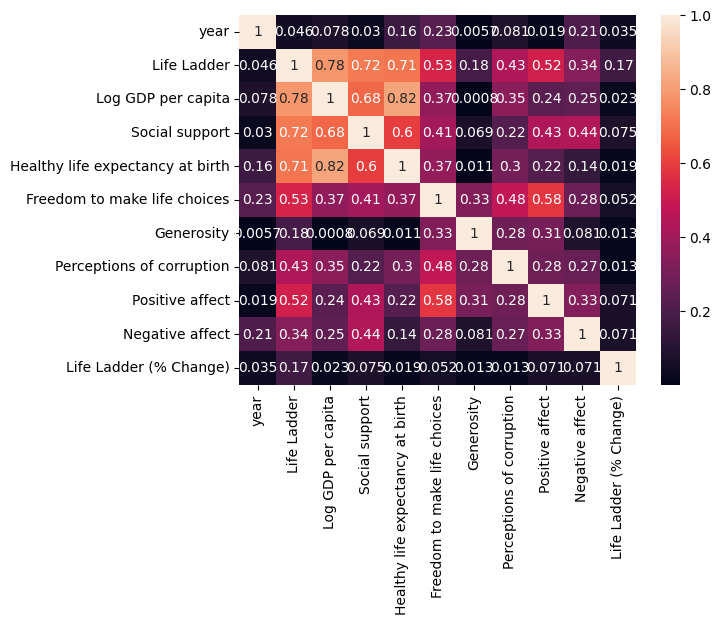

In [25]:
eda_analyzer.get_heat_map()

In [26]:
eda_analyzer.get_top_correlated_pairs()

Column 1                          Column 2  \
20            Log GDP per capita  Healthy life expectancy at birth   
10                   Life Ladder                Log GDP per capita   
11                   Life Ladder                    Social support   
12                   Life Ladder  Healthy life expectancy at birth   
19            Log GDP per capita                    Social support   
27                Social support  Healthy life expectancy at birth   
42  Freedom to make life choices                   Positive affect   
13                   Life Ladder      Freedom to make life choices   
16                   Life Ladder                   Positive affect   
41  Freedom to make life choices         Perceptions of corruption   

    Correlation Coefficient Correlation Category  
20                 0.818126                 High  
10                 0.784871                 High  
11                 0.721663                 High  
12                 0.713493                 High  
19                 0.683619             Moderate  
27                 0.597682             Moderate  
42                 0.578752             Moderate  
13                 0.534532             Moderate  
16                 0.518207             Moderate  
41                 0.476537             Moderate

    - In general : The most correlated values are Log GDP per capita	and Healthy life expectancy at birth. The rest shows how happiness comes if you are given more money and social support. 

In [27]:
eda_analyzer.get_top_correlated_pairs_by_column(column_name="Life Ladder")

Column 1                          Column 2  Correlation Coefficient  \
10  Life Ladder                Log GDP per capita                 0.784871   
11  Life Ladder                    Social support                 0.721663   
12  Life Ladder  Healthy life expectancy at birth                 0.713493   
13  Life Ladder      Freedom to make life choices                 0.534532   
16  Life Ladder                   Positive affect                 0.518207   
15  Life Ladder         Perceptions of corruption                 0.431569   
17  Life Ladder                   Negative affect                 0.339992   
14  Life Ladder                        Generosity                 0.181658   
18  Life Ladder            Life Ladder (% Change)                 0.170925   
0          year                       Life Ladder                 0.045943   

   Correlation Category  
10                 High  
11                 High  
12                 High  
13             Moderate  
16             Moderate  
15             Moderate  
17             Moderate  
14                  Low  
18                  Low  
0                   Low

    - Speaking in terms of happiness, as years change things dont change/reflect on happiness as its the least correlated. 
    - all parameters are typical in correlation with the standared of living. which I belive is the main parameter the authors consider for happiness.

5. Can you identify any limitations, missing values or distortions of the data? 

In [28]:
eda_analyzer.display_column_info()

Column Name  Non-null Count  Percent Non-null  \
0                       Country name            2199        100.000000   
1                               year            2199        100.000000   
2                        Life Ladder            2199        100.000000   
3                     Social support            2186         99.408822   
4                    Negative affect            2183         99.272397   
5                 Log GDP per capita            2179         99.090496   
6                    Positive affect            2175         98.908595   
7       Freedom to make life choices            2166         98.499318   
8   Healthy life expectancy at birth            2145         97.544338   
9                         Generosity            2126         96.680309   
10         Perceptions of corruption            2083         94.724875   
11            Life Ladder (% Change)            2034         92.496589   

   Data Type  
0     object  
1      int64  
2    float64  
3    float64  
4    float64  
5    float64  
6    float64  
7    float64  
8    float64  
9    float64  
10   float64  
11   float64

In [29]:
eda_analyzer.get_missing_rows()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
13    Afghanistan  2022     1.281271                 NaN        0.228217   
14        Albania  2007     4.634252            9.121704        0.821372   
29        Algeria  2010     5.463567            9.306355             NaN   
32        Algeria  2014     6.354898            9.355415        0.818189   
...           ...   ...          ...                 ...             ...   
2155        Yemen  2007     4.477133            8.211859        0.824969   
2163        Yemen  2016     3.825631            7.552322        0.775407   
2164        Yemen  2017     3.253560            7.243477        0.789555   
2167       Zambia  2006     4.824455            7.834035        0.797665   
2182     Zimbabwe  2006     3.826268            7.459545        0.821656   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
13                           54.875000                      0.368377   
14                           66.760002                      0.528605   
29                           65.500000                      0.592696   
32                           65.900002                           NaN   
...                                ...                           ...   
2155                         58.720001                      0.672685   
2163                         58.174999                      0.532964   
2164                         57.950001                      0.595191   
2167                         46.759998                      0.720972   
2182                         40.400002                      0.431110   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0       0.167652                   0.881686         0.414297         0.258195   
13           NaN                   0.733198         0.205868         0.575512   
14     -0.010429                   0.874700         0.488819         0.246335   
29     -0.209753                   0.618038              NaN              NaN   
32           NaN                        NaN         0.558359         0.176866   
...          ...                        ...              ...              ...   
2155    0.009045                        NaN         0.523652         0.378784   
2163   -0.140766                        NaN         0.401007         0.227925   
2164   -0.124107                        NaN         0.368106         0.295064   
2167   -0.008994                   0.785281         0.663519         0.226278   
2182   -0.059926                   0.904757         0.668662         0.297147   

      Life Ladder (% Change)  
0                        NaN  
13                -47.403408  
14                       NaN  
29                       NaN  
32                 13.387278  
...                      ...  
2155                     NaN  
2163               28.261790  
2164              -14.953634  
2167                     NaN  
2182                     NaN  

[352 rows x 12 columns]

In [30]:
eda_analyzer.get_missing_rows().drop(columns=['Country name']).mean()

year                                2011.110795
Life Ladder                            5.476915
Log GDP per capita                     9.531857
Social support                         0.824012
Healthy life expectancy at birth      62.653574
Freedom to make life choices           0.749911
Generosity                             0.003443
Perceptions of corruption              0.729850
Positive affect                        0.643346
Negative affect                        0.256682
Life Ladder (% Change)                -0.256926
dtype: float64

In [31]:
eda_analyzer.describe()['mean']

year                                2014.161437
Life Ladder                            5.479226
Log GDP per capita                     9.389766
Social support                         0.810679
Healthy life expectancy at birth      63.294583
Freedom to make life choices           0.747858
Generosity                             0.000096
Perceptions of corruption              0.745195
Positive affect                        0.652143
Negative affect                        0.271501
Life Ladder (% Change)                 0.418340
Name: mean, dtype: float64

    - missing values or distortions - 5% data on the perception of corruption is missing and generosity. they also dont have much correlation with happiness which might be a reason why the authors might have been fine with it
      - Reason for missing values should be read upon.

      - Another distortion is the drop in countries participating recently
      

6. What would you like to see in this dataset?

    * Employment
    * mental health index
    * income, gender and race inequality
    * leisure time spent
    * environmental factors
    * Social engagement
    * access to healthcare
    * their own perception of happiness rating
    * internet access
    * Safety
    * public service
    * social media usage
    * PPP
    * access to higher education
    * class mobility
    * food sequrity
    * housing parameters
    * age, average savings, income, spends
    

7. What is your evaluation of the quality of the data? 

In summary, while the dataset provides valuable insights into happiness determinants, addressing missing values, investigating data trends, and incorporating additional factors would further improve its quality and robustness.

The analysis and conclusions generated above answer this question

### Data quality evaluvation : 
 * the dataset describes happiness of different countries and some parameters associated with it over time
 * The data has missing values for some columns at 5% max. the missing percent are displayed above
 * Can comment much on data outliers are the columns are metrics
 * Ther is high covariance inbelow
    - Log GDP per capita	Healthy life 
    - Life Ladder	Log GDP per capita	
    - Life Ladder	Social support	
    - Life Ladder	Healthy life expectancy at birth
 * Recommendations :
    - consider other parameters that are more related to class, environment and living conditions
    - Some parameters are corelated which can skew the happiness rating. need to declutter them
    - There is no need of any major cleaning as this data is published clean

8. What is the happiest country in 2023? In 2013? Of all time? What is the least happy country in
2023, 2013 and of all time?

In [32]:
eda_analyzer.get_most_least_happy_countries([2013,2022])

Year Most Happy Country  Most Happy Value Least Happy Country  \
0      2013             Canada          7.593794               Syria   
1      2022            Finland          7.728998         Afghanistan   
2  All Time            Denmark          8.018934         Afghanistan   

   Least Happy Value  
0           2.687553  
1           1.281271  
2           1.281271

    Happiest country in 2022: Finland (7.728998	).
    Happiest country in 2013: Canada (7.593794).
    Happiest country of all time: Denmark (8.018934).
    Least happy country in 2022: Afghanistan (1.281271).
    Least happy country in 2013: Syria (2.687553).
    Least happy country of all time: Afghanistan (1.2812).

9. Of the countries in this dataset, which country had the largest increase in happiness from its start
of participation to 2023? Which had the largest decrease in happiness?

In [40]:
change_data = eda_analyzer.find_largest_change_in_happiness().sort_values(by="% Change")
change_data

Country  Start Year  Start Happiness  End Year  \
0            Afghanistan        2008         3.723590      2022   
61               Lebanon        2005         5.491245      2022   
55                Jordan        2005         6.294660      2022   
93          Sierra Leone        2006         3.628185      2022   
10              Botswana        2006         4.739367      2022   
..                   ...         ...              ...       ...   
103                 Togo        2006         3.202429      2022   
12              Bulgaria        2007         3.843798      2022   
80             Nicaragua        2006         4.460158      2022   
37               Georgia        2006         3.675108      2022   
20   Congo (Brazzaville)        2008         3.819792      2022   

     End Happiness   % Change  
0         1.281271 -65.590435  
61        2.352428 -57.160396  
55        4.355607 -30.804738  
93        2.560430 -29.429465  
10        3.435275 -27.516163  
..             ...        ...  
103       4.238982  32.367706  
12        5.378349  39.922778  
80        6.392258  43.319075  
37        5.292755  44.016298  
20        5.804919  51.969488  

[114 rows x 6 columns]

In [34]:
largest_increase = change_data.loc[change_data['% Change'].idxmax()]

print(str(largest_increase['Country'])+" got the largest increase in happiness from "+str(largest_increase['Start Happiness'])+" to "+str(largest_increase['End Happiness'])+ " from "+ str(largest_increase['Start Year'])+ " to "+str(largest_increase['End Year']))

Congo (Brazzaville) got the largest increase in happiness from 3.8197922706604004 to 5.8049187660217285 from 2008 to 2022


In [41]:
largest_increase = change_data.loc[change_data['% Change'].idxmin()]

print(str(largest_increase['Country'])+" got the largest decrease in happiness from "+str(largest_increase['Start Happiness'])+" to "+str(largest_increase['End Happiness'])+ " from "+ str(largest_increase['Start Year'])+ " to "+str(largest_increase['End Year']))

Afghanistan got the largest decrease in happiness from 3.7235898971557617 to 1.2812711000442505 from 2008 to 2022
